<a href="https://www.kaggle.com/code/vyom9670k/1-worldgdp-analysis-1960-2020-rand-fors-regress?scriptVersionId=112585431" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=15)

/kaggle/input/world-bank-data-1960-to-2016-extended/life_expectancy.csv
/kaggle/input/world-bank-data-1960-to-2016-extended/list_of_developed_countries.csv
/kaggle/input/world-bank-data-1960-to-2016-extended/Countries_and_continents_of_the_world.csv
/kaggle/input/world-bank-data-1960-to-2016-extended/country_population.csv
/kaggle/input/world-bank-data-1960-to-2016-extended/list_of_developed_or_developing_countries.csv
/kaggle/input/world-bank-data-1960-to-2016-extended/fertility_rate.csv
/kaggle/input/world-bank-data-1960-to-2016-extended/list_of_less_or_under_developed_countries.csv
/kaggle/input/world-bank-data-1960-to-2016-extended/weo2020electricityaccessdatabase/Africa-Table 1.csv
/kaggle/input/world-bank-data-1960-to-2016-extended/weo2020electricityaccessdatabase/Summary-Table 1.csv
/kaggle/input/world-bank-data-1960-to-2016-extended/weo2020electricityaccessdatabase/Central and South America-Table 1.csv
/kaggle/input/world-bank-data-1960-to-2016-extended/weo2020electricityaccess

### About Dataset - 
The dataset is a subset of data obtained from World Bank national accounts data, and OECD National Accounts data files. It contains Country names, Country codes and GDP for years from 1960 - 2020 as annual gross domestic income in US dollars for that year.



Periodicity: Annual

Statistical Concept and Methodology: Gross domestic product (GDP) represents the sum of value added by all its producers. Value added is the value of the gross output of producers less the value of intermediate goods and services consumed in production, before accounting for consumption of fixed capital in production. The United Nations System of National Accounts calls for value added to be valued at either basic prices (excluding net taxes on products) or producer prices (including net taxes on products paid by producers but excluding sales or value added taxes). Both valuations exclude transport charges that are invoiced separately by producers. Total GDP is measured at purchaser prices. Value added by industry is normally measured at basic prices.

### Fucntion for Check missing value

In [2]:
def check_miss(df) :
    return df.isnull().sum()/df.shape[0]*100

### Observation  - 
1. Each column are contains --> Year wise GDP of country
1. Each row contain name of country correspondinhg to code of country

In [3]:
df = pd.read_csv('../input/world-gdp-analysis-1960-2022/Country GDP 1960-2020.csv')
df.head(2)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.430000e+11,9.510000e+11,9.640000e+11,9.850000e+11,9.200000e+11,8.730000e+11,9.850000e+11,1.010000e+12,1.010000e+12,9.210000e+11
1,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,6.710000e+11,7.280000e+11,8.210000e+11,8.650000e+11,7.610000e+11,6.910000e+11,6.840000e+11,7.420000e+11,7.950000e+11,7.850000e+11


In [4]:
print('Shape of the Dataset',df.shape )
# print('\n\n')
# print('Information of dataset :',df.info())
# print('\n\n')
print('Missing value in dataset: \n\n',check_miss(df))

Shape of the Dataset (120, 63)
Missing value in dataset: 

 Country Name    0.000000
Country Code    0.000000
1960            0.833333
1961            0.000000
1962            0.000000
                  ...   
2016            0.000000
2017            0.000000
2018            0.000000
2019            0.000000
2020            0.000000
Length: 63, dtype: float64


### Observation-
[1]   There is missing value 0.83333 % in the year 1960 which is intial phase of data collection, so we can drop the row, Not going to affect out dataset

In [5]:
clm = list(df['Country Name'])

In [6]:
print('List of column in dataset -')
print('')
print(clm)

List of column in dataset -

['Africa Eastern and Southern', 'Africa Western and Central', 'Australia', 'Austria', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bahamas, The', 'Belize', 'Bermuda', 'Bolivia', 'Botswana', 'Central African Republic', 'Canada', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Costa Rica', 'Caribbean small states', 'Dominican Republic', 'Algeria', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'East Asia & Pacific', 'Ecuador', 'Euro area', 'Spain', 'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Ghana', 'Greece', 'Guatemala', 'Guyana', 'High income', 'Hong Kong SAR, China', 'Honduras', 'Heavily indebted poor countries (HIPC)', 'Haiti', 'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only', 'India', 'Ireland', 'Iceland', 'Italy', 'Jamaica', 'Japan', 'Kenya', 'St. Kitts and Nevis', 'Korea, Rep.', 'Sri Lanka', 'Lower middle income', 'Low & middl

In [7]:
df2 = df.T
df2.columns = clm
df2.head()

,Africa Eastern and Southern,Africa Western and Central,Australia,Austria,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,"Bahamas, The",...,Turkey,Uganda,Upper middle income,Uruguay,United States,St. Vincent and the Grenadines,World,South Africa,Zambia,Zimbabwe
Country Name,Africa Eastern and Southern,Africa Western and Central,Australia,Austria,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,"Bahamas, The",...,Turkey,Uganda,Upper middle income,Uruguay,United States,St. Vincent and the Grenadines,World,South Africa,Zambia,Zimbabwe
Country Code,AFE,AFW,AUS,AUT,BDI,BEL,BEN,BFA,BGD,BHS,...,TUR,UGA,UMC,URY,USA,VCT,WLD,ZAF,ZMB,ZWE
1960,19313106302.0,10404280784.0,18606786874.0,6592693841.0,195999990.0,11658722591.0,226195579.4,330442817.2,4274893913.0,169803921.6,...,13995067818.0,423008385.7,248000000000.0,1242289239.0,543000000000.0,13066557.78,1390000000000.0,7575396973.0,713000000.0,1052990400.0
1961,19723488057.0,11128050589.0,19683055213.0,7311749633.0,202999992.0,12400145222.0,235668222.4,350247237.1,4817580184.0,190098039.2,...,7988888889.0,441524109.0,218000000000.0,1547388781.0,563000000000.0,13999883.33,1440000000000.0,7972996814.0,696285714.3,1096646600.0
1962,21493920015.0,11943353288.0,19922723709.0,7756110210.0,213500006.0,13264015675.0,236434906.8,379567023.3,5081413340.0,212254902.0,...,8922222222.0,449012578.6,224000000000.0,1710004407.0,605000000000.0,14524878.96,1550000000000.0,8497996604.0,693142857.1,1117601600.0


In [8]:
df3 = df2.drop(labels=['Country Name','Country Code'])  # Deleting the repeated column from the dataset
df3.reset_index(inplace=True)
df3. rename(columns = {'index':'Year'}, inplace = True)

### Observation -
[2]  Dataset rearange in convenient form ,and deleted the country code in from dataset

In [9]:
df3.head(2)

,Year,Africa Eastern and Southern,Africa Western and Central,Australia,Austria,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,...,Turkey,Uganda,Upper middle income,Uruguay,United States,St. Vincent and the Grenadines,World,South Africa,Zambia,Zimbabwe
0,1960,19313106302.0,10404280784.0,18606786874.0,6592693841.0,195999990.0,11658722591.0,226195579.4,330442817.2,4274893913.0,...,13995067818.0,423008385.7,248000000000.0,1242289239.0,543000000000.0,13066557.78,1390000000000.0,7575396973.0,713000000.0,1052990400.0
1,1961,19723488057.0,11128050589.0,19683055213.0,7311749633.0,202999992.0,12400145222.0,235668222.4,350247237.1,4817580184.0,...,7988888889.0,441524109.0,218000000000.0,1547388781.0,563000000000.0,13999883.33,1440000000000.0,7972996814.0,696285714.3,1096646600.0


In [10]:
df3.skew()

Year                              0.000000
Africa Eastern and Southern       1.042362
Africa Western and Central        1.234988
Australia                         1.106102
Austria                           0.476856
                                    ...   
St. Vincent and the Grenadines    0.537623
World                             0.789712
South Africa                      0.763157
Zambia                            1.381278
Zimbabwe                          1.121748
Length: 121, dtype: float64

<AxesSubplot:ylabel='Frequency'>

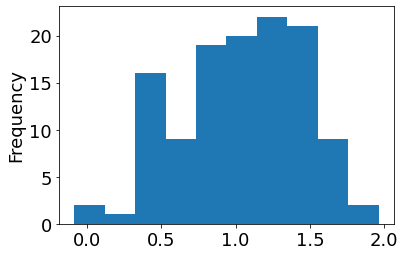

In [11]:
# To identify the ballance data set or not
df3.skew().plot(kind = 'hist')

In [12]:
### extracting the outlier using interquentile range between 0.25 and 0.75 % of dataset

In [13]:
Q1 = df3.quantile(0.25)#0.25
Q3 = df3.quantile(0.75)# 0.75
IQR = Q3 - Q1

df4 = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [14]:
df4.skew().max()

1.9628592679784436

### Observation - 
[3] The normal range for skewness and kurtosis +2 and -2 for normal distribution. You cane refer this paper (George & Mallory 2010)

In [15]:
check_miss(df4)

Year                              0.0
Africa Eastern and Southern       0.0
Africa Western and Central        0.0
Australia                         0.0
Austria                           0.0
                                 ... 
St. Vincent and the Grenadines    0.0
World                             0.0
South Africa                      0.0
Zambia                            0.0
Zimbabwe                          0.0
Length: 121, dtype: float64

### Observation - 
[4]  Maximum missing value is only 1.634 % so we drop the row not going to affect the dataset

In [16]:
df_main = df4
df4 = df4.dropna()

In [17]:
check_miss(df4).max()

0.0

[4]  Now Maximum missing value is 0.0 

## Feature selection 

#### [1] income based
1. 'Heavily indebted poor countries (HIPC)'
1. 'East Asia & Pacific (excluding high income)
1. 'Lower middle income',
1. 'Low & middle income'
1. 'Middle income'
1. 'High income'
1. 'Upper middle income'
1. 'Sub-Saharan Africa (excluding high income)'

#### [2] Banks
1. 'World'
1. 'IDA - 'International Development Association'
1. 'East Asia & Pacific (IDA & IBRD countries)'
1. 'IBRD only'
1. 'IDA & IBRD total', 
1. 'IDA total',
1. 'IDA blend', 
1. 'IDA only',
1. 'Latin America & the Caribbean (IDA & IBRD countries)',
1. 'South Asia (IDA & IBRD)'

#### [3] The International Bank for Reconstruction and Development (IBRD)
1. is a global development cooperative owned by 189 member countries.
#### [4] Democretice country---
1. 'Late-demographic dividend'
1. 'Early-demographic dividend'
1.  'Pre-demographic dividend'
1. 'Post-demographic dividend'
#### [5] Member 
1. 'OECD members'  :  'The Organisation for Economic Co-operation and Development (OECD) is a group of 37 member countries that discuss and develop 
1. economic and social policy  :   Members of the Organisation for Economic Co-operation and Development (OECD) are typically democratic countries that support free-market economies.'

### Extract data from the dataset basis of economy

In [18]:
clm_icm = ['Sub-Saharan Africa (excluding high income)' ,'East Asia & Pacific (excluding high income)','Lower middle income','Low & middle income','Middle income','High income','Upper middle income']
clm_icm

['Sub-Saharan Africa (excluding high income)',
 'East Asia & Pacific (excluding high income)',
 'Lower middle income',
 'Low & middle income',
 'Middle income',
 'High income',
 'Upper middle income']

In [19]:
df_income = df4[clm_icm]
df_income['Year'] = df4['Year']
df_income.head(2)

,Sub-Saharan Africa (excluding high income),East Asia & Pacific (excluding high income),Lower middle income,Low & middle income,Middle income,High income,Upper middle income,Year
1,30399832763.0,71608358396.0,95151131662.0,326000000000.0,313000000000.0,1130000000000.0,218000000000.0,1961
2,32936474200.0,65391067390.0,96667238933.0,334000000000.0,320000000000.0,1220000000000.0,224000000000.0,1962


In [20]:
print(df_income.shape)
print(df_income.info())

(60, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Sub-Saharan Africa (excluding high income)   60 non-null     object
 1   East Asia & Pacific (excluding high income)  60 non-null     object
 2   Lower middle income                          60 non-null     object
 3   Low & middle income                          60 non-null     object
 4   Middle income                                60 non-null     object
 5   High income                                  60 non-null     object
 6   Upper middle income                          60 non-null     object
 7   Year                                         60 non-null     object
dtypes: object(8)
memory usage: 4.2+ KB
None


In [21]:
## Country - bank 
clm_bank = ['World','East Asia & Pacific (IDA & IBRD countries)','IBRD only','IDA & IBRD total', 'IDA total','IDA blend', 'IDA only','Latin America & the Caribbean (IDA & IBRD countries)','South Asia (IDA & IBRD)','Sub-Saharan Africa (IDA & IBRD countries)','Heavily indebted poor countries (HIPC)']

In [22]:
df_bank = df4[clm_bank]
df_bank['Year'] = df4['Year']
df_bank.head(10)

,World,East Asia & Pacific (IDA & IBRD countries),IBRD only,IDA & IBRD total,IDA total,IDA blend,IDA only,Latin America & the Caribbean (IDA & IBRD countries),South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Heavily indebted poor countries (HIPC),Year
1,1440000000000.0,71507028612.0,306000000000.0,346000000000.0,39171910998.0,12910168929.0,27069024092.0,84140069282.0,50331770781.0,30410733044.0,17870143017.0,1961
2,1550000000000.0,65298535416.0,314000000000.0,357000000000.0,42212818827.0,13806056582.0,29292286517.0,92113796551.0,53721519494.0,32948375264.0,19448655144.0,1962
3,1670000000000.0,70737726806.0,337000000000.0,386000000000.0,47440359755.0,14611896046.0,33956035134.0,93696328250.0,60426255395.0,37748216584.0,23465052191.0,1963
4,1820000000000.0,81640221385.0,381000000000.0,428000000000.0,46316953287.0,15945498103.0,31226319629.0,104000000000.0,69179494304.0,36866803374.0,20962585729.0,1964
5,1990000000000.0,95037886875.0,418000000000.0,471000000000.0,52062026811.0,17314123646.0,35798033953.0,112000000000.0,74296512694.0,41061560164.0,24482824415.0,1965
6,2160000000000.0,104000000000.0,432000000000.0,489000000000.0,56494440043.0,18833575076.0,38793754890.0,123000000000.0,62475116958.0,44304731190.0,26660840619.0,1966
7,2290000000000.0,101000000000.0,443000000000.0,501000000000.0,56939198533.0,18930353850.0,39158109671.0,125000000000.0,68733357253.0,43799651902.0,26116080029.0,1967
8,2480000000000.0,102000000000.0,468000000000.0,529000000000.0,60012196796.0,19982313523.0,41237121777.0,134000000000.0,72039818017.0,46833297634.0,27635788373.0,1968
9,2730000000000.0,115000000000.0,522000000000.0,591000000000.0,67380577689.0,22860641669.0,45818566360.0,150000000000.0,79195490145.0,53552935963.0,30708658406.0,1969
10,2990000000000.0,127000000000.0,568000000000.0,648000000000.0,78229765508.0,31424476414.0,47655485007.0,163000000000.0,85737283040.0,63016042903.0,32187736280.0,1970


In [23]:
print(df_bank.shape)
print(df_bank.info())

(60, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   World                                                 60 non-null     object
 1   East Asia & Pacific (IDA & IBRD countries)            60 non-null     object
 2   IBRD only                                             60 non-null     object
 3   IDA & IBRD total                                      60 non-null     object
 4   IDA total                                             60 non-null     object
 5   IDA blend                                             60 non-null     object
 6   IDA only                                              60 non-null     object
 7   Latin America & the Caribbean (IDA & IBRD countries)  60 non-null     object
 8   South Asia (IDA & IBRD)                               60 non-nu

In [24]:
### Country Member
clm_mem = ['OECD members']
df_group = df4[clm_mem]
df_group['Year'] = df4['Year']
df_group.head(2)

,OECD members,Year
1,1140000000000.0,1961
2,1230000000000.0,1962


In [25]:
### Democretice country---
clm_demo = ['Late-demographic dividend','Early-demographic dividend', 'Pre-demographic dividend','Post-demographic dividend']
clm_demo

['Late-demographic dividend',
 'Early-demographic dividend',
 'Pre-demographic dividend',
 'Post-demographic dividend']

In [26]:
df_demo = df4[clm_demo]
df_demo['Year'] = df4['Year']
df_demo.head(2)

,Late-demographic dividend,Early-demographic dividend,Pre-demographic dividend,Post-demographic dividend,Year
1,173000000000.0,157000000000.0,21565864934.0,1110000000000.0,1961
2,176000000000.0,162000000000.0,23608069249.0,1190000000000.0,1962


In [27]:
def country_data(data) :
    temp = data.drop(columns=clm_demo,axis= 1)
    temp = temp.drop(columns=clm_bank,axis= 1)
    temp = temp.drop(columns=clm_icm,axis= 1)
    return temp.drop(columns=clm_mem,axis= 1)
df_country = country_data(df4)
df_country.head(2)

,Year,Africa Eastern and Southern,Africa Western and Central,Australia,Austria,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,...,Thailand,Trinidad and Tobago,Turkey,Uganda,Uruguay,United States,St. Vincent and the Grenadines,South Africa,Zambia,Zimbabwe
1,1961,19723488057.0,11128050589.0,19683055213.0,7311749633.0,202999992.0,12400145222.0,235668222.4,350247237.1,4817580184.0,...,3034043574.0,584961208.7,7988888889.0,441524109.0,1547388781.0,563000000000.0,13999883.33,7972996814.0,696285714.3,1096646600.0
2,1962,21493920015.0,11943353288.0,19922723709.0,7756110210.0,213500006.0,13264015675.0,236434906.8,379567023.3,5081413340.0,...,3308912797.0,619319197.3,8922222222.0,449012578.6,1710004407.0,605000000000.0,14524878.96,8497996604.0,693142857.1,1117601600.0


In [28]:
df_country.keys()

Index(['Year', 'Africa Eastern and Southern', 'Africa Western and Central',
       'Australia', 'Austria', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bahamas, The', 'Belize', 'Bermuda', 'Bolivia',
       'Botswana', 'Central African Republic', 'Canada', 'Chile', 'China',
       'Cote d'Ivoire', 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Costa Rica', 'Caribbean small states',
       'Dominican Republic', 'Algeria', 'East Asia & Pacific', 'Ecuador',
       'Euro area', 'Spain', 'Finland', 'Fiji', 'France', 'Gabon',
       'United Kingdom', 'Ghana', 'Greece', 'Guatemala', 'Guyana',
       'Hong Kong SAR, China', 'Honduras', 'Haiti', 'India', 'Ireland',
       'Iceland', 'Italy', 'Jamaica', 'Japan', 'Kenya', 'St. Kitts and Nevis',
       'Korea, Rep.', 'Sri Lanka', 'Lesotho', 'Luxembourg', 'Morocco',
       'Madagascar', 'Mexico', 'Malawi', 'Malaysia', 'North America', 'Niger',
       'Nigeria', 'Nicaragua', 'Netherlands', 'Norway', 'Nepal'

## Data Analysis
### Which country or continent have higher GDP ?

In [29]:
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import iplot

In [30]:
def GDP_plot(data,title) :
    clm = data.keys()
    fig = px.area(data,x = 'Year' ,y = clm,title = 'GDP Growth visualization for ' +str(title), width=1100,height=500)
    return iplot(fig,auto_play=True)

In [31]:
GDP_plot(df_country ,"Country and continent")

## Which organization has highest reserve ?

In [32]:
GDP_plot(df_bank ,'Bank')

1. From the data set from 1960 to 2020 world bank have highest reserve as 87.5 Trillion and then IDA & IBRD orgenization have highest reserve fund
2. There is sharp cutting adge can be observe in the year 2008 and 2009 due to world globle crices were observe
3. The 2008 financial crisis began **with cheap credit** and lax lending standards that fueled a housing bubble. When the bubble burst, the banks were left holding trillions of dollars of worthless investments in subprime mortgages. The Great Recession that followed cost many their jobs, their savings, and their homes.

In [33]:
GDP_plot(df_income ,'Income')
print('The heavily indebted poor countries (HIPC) are a group of 39 developing countries with high levels of poverty and debt overhang which are eligible for special assistance from the International Monetary Fund (IMF) and the World Bank. ')

The heavily indebted poor countries (HIPC) are a group of 39 developing countries with high levels of poverty and debt overhang which are eligible for special assistance from the International Monetary Fund (IMF) and the World Bank. 


In [34]:
clm_icm

['Sub-Saharan Africa (excluding high income)',
 'East Asia & Pacific (excluding high income)',
 'Lower middle income',
 'Low & middle income',
 'Middle income',
 'High income',
 'Upper middle income']

In [35]:
GDP_plot(df_demo ,'Pre and Post Democretic Country')
print('')

Any demographic dividend depends on whether the government implements the right policies in areas such as education, health, governance, and the economy. [Invetopedia]
 There are four main areas where a country can find demographic dividends:

1.  Savings—During the demographic period, personal savings grow and can be used to stimulate the economy.
1.  Labor supply—More workers are added to the labor force, including more women.
3.  Human capital—With fewer births, parents are able to allocate more resources per child, leading to better educational and health outcomes.
4. Economic growth—GDP per capita is increased due to a decrease in the dependency ratio.


### Country wise DGP growth rate

In [36]:
def GDP_of_country(data) :
    count_list = []
    cd = list(data.columns)
    n = int(input('Pls enter the Number of country you want to display  : '  ))
    print('\n\n',cd[1:])  
    for i in range(n) :
        count_list.append(input('\n\n Pls select country Name from above and enter here :  ' ))       
    iplot(px.line(data,x = 'Year' ,y =count_list ,title = 'GDP Growth Analysis between '+str(count_list)))


In [37]:
count_list = ['United States',"North America",'United Kingdom','India',"France","China", ] 

In [38]:
df_country.keys()

Index(['Year', 'Africa Eastern and Southern', 'Africa Western and Central',
       'Australia', 'Austria', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bahamas, The', 'Belize', 'Bermuda', 'Bolivia',
       'Botswana', 'Central African Republic', 'Canada', 'Chile', 'China',
       'Cote d'Ivoire', 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Costa Rica', 'Caribbean small states',
       'Dominican Republic', 'Algeria', 'East Asia & Pacific', 'Ecuador',
       'Euro area', 'Spain', 'Finland', 'Fiji', 'France', 'Gabon',
       'United Kingdom', 'Ghana', 'Greece', 'Guatemala', 'Guyana',
       'Hong Kong SAR, China', 'Honduras', 'Haiti', 'India', 'Ireland',
       'Iceland', 'Italy', 'Jamaica', 'Japan', 'Kenya', 'St. Kitts and Nevis',
       'Korea, Rep.', 'Sri Lanka', 'Lesotho', 'Luxembourg', 'Morocco',
       'Madagascar', 'Mexico', 'Malawi', 'Malaysia', 'North America', 'Niger',
       'Nigeria', 'Nicaragua', 'Netherlands', 'Norway', 'Nepal'

In [39]:
iplot(px.area(df_country,x = 'Year' ,y =count_list ,title = 'GDP Growth Analysis between '+str(count_list)),)

### Observation - 
 1. The world economy mainly faces three cries - 
 1. Great recession in 2007 -2009, mainly observed in the developed countries
 1. Russia's infection on the premium, impact over the developed country where India, China, and the USA were on constant GDP Growing rate
 1. In the year 2020 is the World corona pandemic where each country faces the same issues either developing or developed country
 1. Here we are comparing some of big trillion economies growth rate
 1. Devloping countrie were face very minor impact of crices

## Inflution calculted by the  

## = (GDP2 - GPD1 /(GDP1)

In [40]:
df_country.set_index("Year",inplace = True ,drop = True)

In [41]:
def GDP_of_country(data) :
    count_list = []
    cd = list(data.columns)
    n = int(input('Pls enter the Number of country you want to display  : '  ))
    print('\n\n',cd[1:])  
    for i in range(n) :
        count_list.append(input('\n\n Pls select country Name from above and enter here :  ' ))       
    iplot(px.line(data ,y =count_list ,title = 'GDP Growth Analysis between '+str(count_list)))

## Selecting the Top 5 Economy of world and make comparison 

<AxesSubplot:xlabel='Year'>

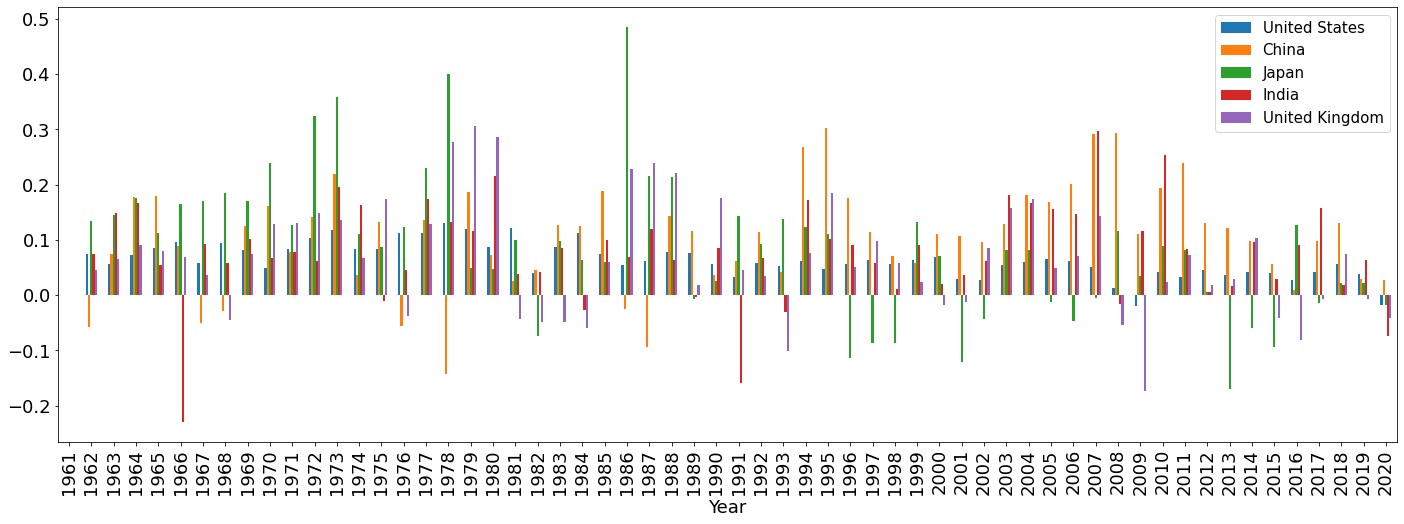

In [42]:
df_country[['United States', 'China','Japan', 'India','United Kingdom']].pct_change(periods= 1).plot(kind = "bar" ,figsize = (24,8))

## Observation 
1. The percentage change in GDP is observed in japan, showing the green color and representing the highest rate of growing GDP between the year 1996, but after that, the increase in GDP growth rate is the random way.
2. The yellow color code shows the Chinese economy with positive growth over time. Also it did not face any single impactful drop in the economy after 1987
3. India faced economic cries in 1966 due to the India  - Pakistan war, and India faced hunger cries in those times. The 1991 crisis in India is believed to have been caused mainly by high fiscal deficits, the loss of confidence in the government, and mounting current account deficits. To overcome those effects, India changed their policy and took the 20 billion loan from the International monetary fund by making a deal on the 7 tons of Indian gold.
3. The Present government was DR. Narasimha Rao, and the finance minister was R. Manmohan Singh.
4. The United Kingdom faced economic cries in the years 1993 and 2008 - 2009 due to global cries. The cries name as bubble blast 
5. USA face cries in the most frequent year, and they have recovered the loss due to existing investment in the other developing countries

1.Here we can observe that the 

In [43]:
d = pd.DataFrame(np.zeros([1,len(clm)]), columns=clm)

## Formulation of GDP percentage

In [44]:
def GDP_percenatge(data) :
    temp = data
    temp2 = pd.concat([d,temp],axis=0)
    temp2.reset_index(inplace =True)
    temp3 = pd.concat([temp,d],axis=0)
    temp3.reset_index(inplace =True)
    x1 = temp2.astype('float64')
    x2 = temp3.astype('float64')
    gdp_grw = x2.sub(x1).div(x1)*100
    gdp_grw = gdp_grw.replace([np.nan,np.inf],0)
    x = len(gdp_grw) -1 
    gdp_grw.loc[x] = gdp_grw.loc[x-1].mean()
    temp4 =  gdp_grw.drop(['index'], axis=1)
    temp4['Year'] = df3['Year']
    
    return  temp4.drop(x)

In [45]:
df_gdp= GDP_percenatge(df_country).drop(labels = 0,axis=0)
df_gdp.head(3)

,Africa Eastern and Southern,Africa Western and Central,Algeria,Australia,Austria,"Bahamas, The",Bangladesh,Belgium,Belize,Benin,...,Turkey,Uganda,United Kingdom,United States,Upper middle income,Uruguay,World,Zambia,Zimbabwe,Year
1,8.976262,7.326555,-17.796613,1.217639,6.077349,11.655493,5.476466,6.966616,6.316008,0.325324,...,11.682893,1.696050,4.509274,7.460036,0.0,10.509035,0.0,-0.451375,1.910825,1961
2,19.723215,6.138663,35.051557,8.117376,7.968750,12.009238,4.684622,7.509051,5.940568,7.398544,...,16.064757,14.951746,6.540993,5.619835,0.0,-9.960379,0.0,3.689200,3.750004,1962
3,-8.571681,9.167043,7.633585,10.497582,9.503128,12.164948,1.251937,11.922070,7.242857,6.258216,...,7.939914,14.125567,9.063561,7.355243,0.0,28.318865,0.0,16.795866,4.969877,1963


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
fig = px.area(df_gdp,x='Year',y= ['India','United States','China'])

In [48]:
fig

## GDP Analysis by existing Dataset specialy for India

In [49]:
df = pd.read_csv('../input/world-bank-data-1960-to-2016-extended/countries-of-the-world/countries of the world.csv',decimal=',')
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [50]:
### Check Missing value percentage
def check_miss(df) :
    return df.isnull().sum()/df.shape[0]*100

In [51]:
check_miss(df)

Country                               0.000000
Region                                0.000000
Population                            0.000000
Area (sq. mi.)                        0.000000
Pop. Density (per sq. mi.)            0.000000
Coastline (coast/area ratio)          0.000000
Net migration                         1.321586
Infant mortality (per 1000 births)    1.321586
GDP ($ per capita)                    0.440529
Literacy (%)                          7.929515
Phones (per 1000)                     1.762115
Arable (%)                            0.881057
Crops (%)                             0.881057
Other (%)                             0.881057
Climate                               9.691630
Birthrate                             1.321586
Deathrate                             1.762115
Agriculture                           6.607930
Industry                              7.048458
Service                               6.607930
dtype: float64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [53]:
df.describe(include= "all")

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


1. Here, for the region column, we have obtained the missing value as nan, which means we need to fill in the appropriate value so that geographical and cutural identify the same 
1. whcih make sense in the calculation of GDP where literacy, coastal line, population density, and agriculture are matter
1. One of the critical fact that there is a missing value from the float data type means 

In [54]:
from sklearn.impute import SimpleImputer

In [55]:


imputer = SimpleImputer( missing_values=np.nan,strategy= "median")
df2 = pd.DataFrame(imputer.fit_transform(df.iloc[:,2:]) ,columns=df.iloc[:,2:].keys() )
df2.head(5)



,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,57794.0,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.099,0.272,0.571
4,71201.0,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.099,0.272,0.571


In [56]:
df3 = pd.concat([df.iloc[:,:2],df2],axis= 1)
df3.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794.0,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.099,0.272,0.571
4,Andorra,WESTERN EUROPE,71201.0,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.099,0.272,0.571


In [57]:


check_miss(df3)



Country                               0.0
Region                                0.0
Population                            0.0
Area (sq. mi.)                        0.0
Pop. Density (per sq. mi.)            0.0
Coastline (coast/area ratio)          0.0
Net migration                         0.0
Infant mortality (per 1000 births)    0.0
GDP ($ per capita)                    0.0
Literacy (%)                          0.0
Phones (per 1000)                     0.0
Arable (%)                            0.0
Crops (%)                             0.0
Other (%)                             0.0
Climate                               0.0
Birthrate                             0.0
Deathrate                             0.0
Agriculture                           0.0
Industry                              0.0
Service                               0.0
dtype: float64

Text(0.5, 1.0, 'GDP ($ per capita)')

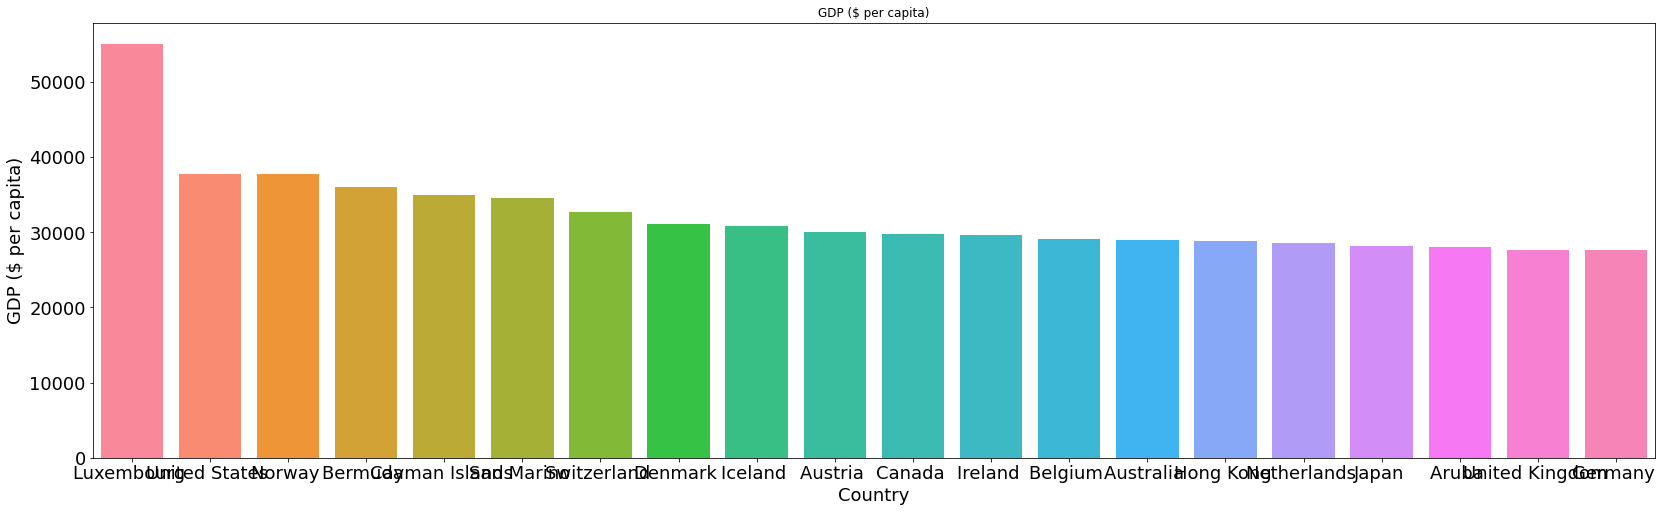

In [58]:
plt.figure(figsize =(28,8) )
sns.barplot(x ="Country",y = "GDP ($ per capita)"  ,data = df3[["Country","GDP ($ per capita)"]].sort_values(by="GDP ($ per capita)",ascending=False ).head(20),saturation=1.0)
plt.title("GDP ($ per capita)",fontsize =12 )

1. To identify the most crucial data filed variable, we need to use the Pearson correlation matrix 
2. Using Seaborn and plotting the meat map of the numerical column

<AxesSubplot:>

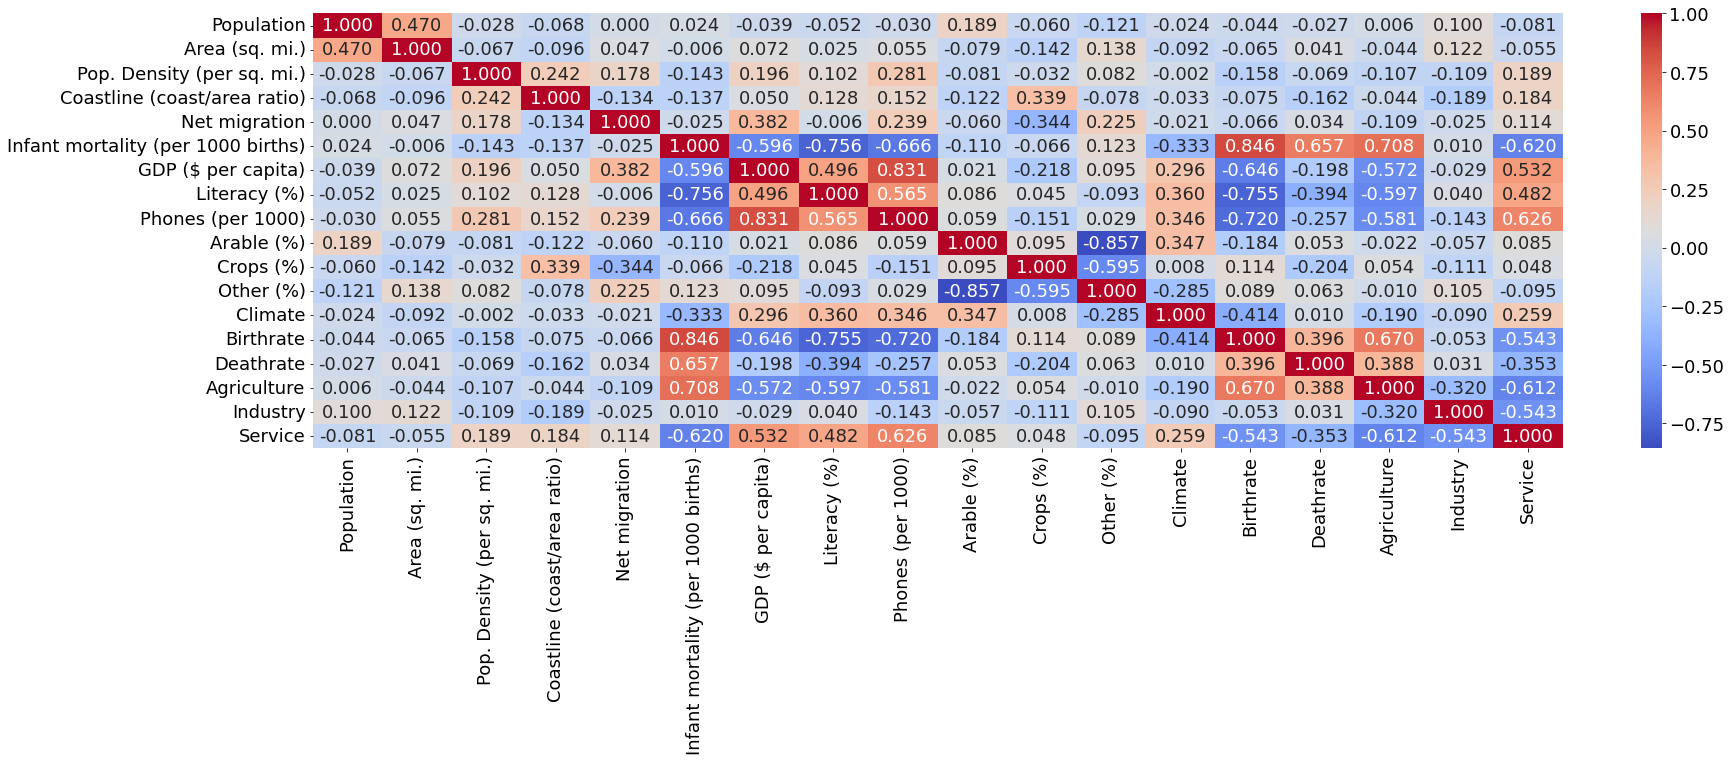

In [59]:
plt.figure(figsize =(28,8) )
sns.heatmap(df3.corr(),annot = True,fmt="0.3f",cmap="coolwarm")

<AxesSubplot:>

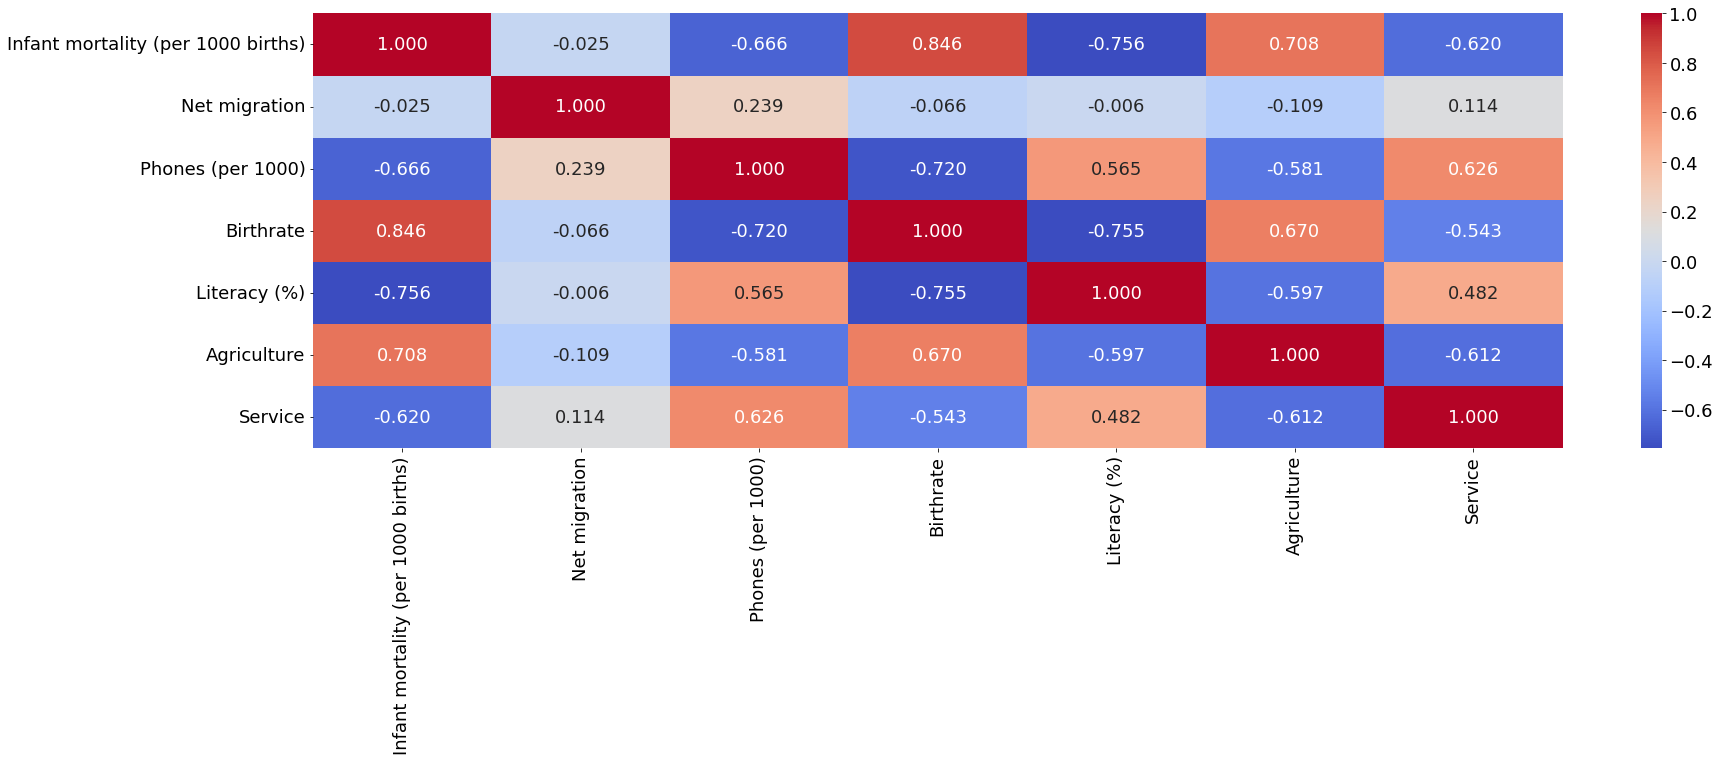

In [60]:
plt.figure(figsize =(28,8) )
sns.heatmap(df3[["Infant mortality (per 1000 births)","Net migration",'Phones (per 1000)','Birthrate','Literacy (%)','Agriculture','Service']].corr(),annot = True,fmt="0.3f",cmap="coolwarm")

1. From the plot, we can see that columns named "Infant mortality (per 1000 births)", "Net migration," 'Phones (per 1000)', 'Birthrate', 'Literacy (%),' 'Agriculture,' 'Service' highly correlated feature among the all.
2. We will proceed to work on it.

### ## Take Scatter plot to visulize the variation of parameter 

In [61]:
from pandas.plotting import scatter_matrix

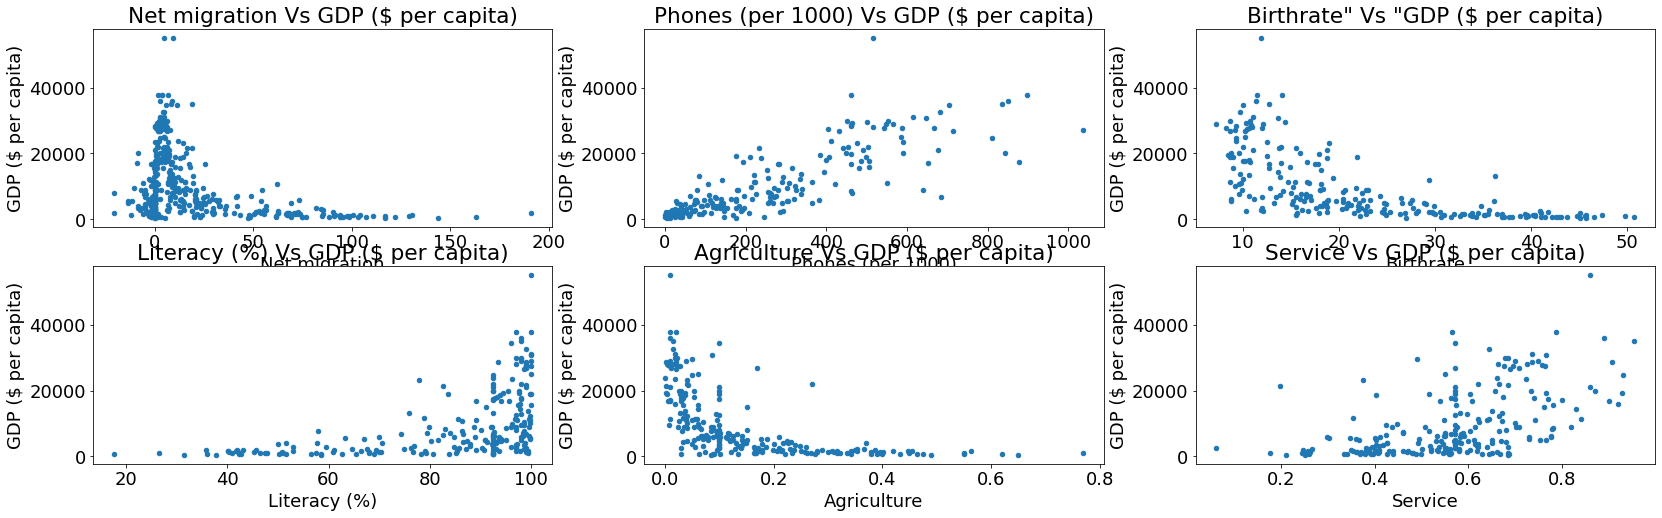

In [62]:
df_temp = df3[["Infant mortality (per 1000 births)","Net migration",'Phones (per 1000)','Birthrate','Literacy (%)','Agriculture','Service',"GDP ($ per capita)"]]
fig, ax =plt.subplots(ncols=3,nrows= 2, sharex=False, figsize=(28,8))
df_temp.plot(kind = 'scatter',x = "Infant mortality (per 1000 births)", y ="GDP ($ per capita)",title  ='Infant mortality (per 1000 births) Vs GDP ($ per capita) ',ax= ax[0, 0])
df_temp.plot(kind = 'scatter',x = "Net migration", y ="GDP ($ per capita)",title  ="Net migration Vs GDP ($ per capita)",    ax= ax[0, 0])
df_temp.plot(kind = 'scatter',x = "Phones (per 1000)", y ="GDP ($ per capita)",title  ="Phones (per 1000) Vs GDP ($ per capita)",ax= ax[0, 1])
df_temp.plot(kind = 'scatter',x = "Birthrate", y ="GDP ($ per capita)",title  ='Birthrate" Vs "GDP ($ per capita)',        ax= ax[0, 2])
df_temp.plot(kind = 'scatter',x = "Literacy (%)", y ="GDP ($ per capita)",title  ='Literacy (%) Vs GDP ($ per capita)',     ax= ax[1, 0])
df_temp.plot(kind = 'scatter',x = "Agriculture", y ="GDP ($ per capita)",title  ="Agriculture Vs GDP ($ per capita)",      ax= ax[1, 1])
df_temp.plot(kind = 'scatter',x = "Service", y ="GDP ($ per capita)",title  ="Service Vs GDP ($ per capita)",      ax= ax[1, 2])
fig.show()



1. Some of the features are positive and linearly related, like service Phone (per 1000) concerning the Country's GDP growth rate
1. Birth rate, Net migration, and agriculture are hyperbolically related
1. whereas Literacy rate seems to like a parabolic relation with the target value
1. People who have Very less high literacy show high growth in GDP
1. People who Have not migrated from one place show a high growth rate
1. The place where the population is less in the sense of it the birth rate is how people show the high GDP growth rate
1. Another essential thing is that people have a low dependency on agriculture. Their contribution is high as compared to an agricultural person
1. 25 to 85 % of people, whether they provide some kind of service, their contribution towards the GDP is high
* Let's look at the countries with low birthrate (<14%) and low GDP per capita (<10000 $). They also have high literacy, like other high-average GDP countries. But we hope their other features can help distinguish them from those with low birthrate but high average GDPs, like service, are not quite an important portion of their economy, not a lot of phone procession, some have negative net migration, and many of them are from eastern Europe or C.W. of IND. STATES, so the 'region' feature may also be useful.


### Model Prepration for Train and test

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
encode = LabelEncoder()

In [65]:
df3["Country"] = encode.fit_transform(df3.iloc[:,:1])
df3["Region"] = encode.fit_transform(df3.iloc[:,1:2])
df3

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,0,31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,1,3,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2,6,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,3,8,57794.0,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.099,0.272,0.571
4,4,10,71201.0,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.099,0.272,0.571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,222,5,2460492.0,5860.0,419.9,0.00,2.98,19.62,800.0,92.5,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,223,6,273008.0,266000.0,1.0,0.42,0.00,21.00,5550.0,92.5,176.2,0.02,0.00,99.98,1.0,18.79,7.84,0.099,0.272,0.400
224,224,5,21456188.0,527970.0,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,225,9,11502010.0,752614.0,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [66]:
df3.keys()

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [67]:
Y = df3[['GDP ($ per capita)']]
X = df3.drop(labels = 'GDP ($ per capita)',axis=1)

In [68]:
print("Shape of Feature data :",X.shape)
print("Shape of Target data:",Y.shape)

Shape of Feature data : (227, 19)
Shape of Target data: (227, 1)


In [69]:
## Train test split 
from sklearn.model_selection import train_test_split

In [70]:
x_train , x_test , y_train ,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [71]:
print("Shape of x_train data :",x_train.shape)
print("Shape of x_test data :",x_test.shape)
print("Shape of y_train data :",y_train.shape)
print("Shape of y_test data :",y_test.shape)

Shape of x_train data : (181, 19)
Shape of x_test data : (46, 19)
Shape of y_train data : (181, 1)
Shape of y_test data : (46, 1)


### Using the linear regression model

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso ,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor,kneighbors_graph

In [73]:
Linear_regresion = Lasso()
parameters = {'alpha': [0.001,0.005,0.01,0.02,0.03,0.04],
                  'max_iter' : [100,500,1000, 1500],
                     'fit_intercept'    : [4,6,8,10,20,50] }
Grd_Linear = GridSearchCV(estimator = Linear_regresion , param_grid=parameters ,cv = 8 )
Grd_Linear.fit(x_train,y_train)
Grd_Linear.best_params_
y_pred_Lasso = Grd_Linear.predict(x_test)
y_pred_Lasso

array([ 6515.13337059,  7449.53335558, 13356.22802616,  1408.60658101,
       13837.3739038 ,  6383.98485934,  6549.92887337,  3148.33629365,
        -691.76070529, 11357.79386394, 31035.97425731,  2291.74366016,
        5249.26126574, 21555.39912816, 11712.57891931, 10278.27666506,
       11727.38962831, -3123.84977573,   901.9880156 ,  3253.60948695,
        2375.95405793, 25953.91955882,  1646.01667236,  5754.96795673,
       14325.41713432, 20307.25833864,  2621.60270761,  4388.09436127,
       16367.89732635,  5962.56028373, 10300.04317757,  2572.11823196,
       24607.74300956, -2168.20606651,  2357.58881216,  7067.15770411,
        8414.98975129,   727.78345374, 21494.9065355 ,  -237.62303733,
       16512.77132788,  1823.50423663,  9527.22295175, 23794.29131728,
       16865.04141447, 26338.94339266])

In [74]:
model_RFR = RandomForestRegressor()
para = {"max_depth":[10,20,25,50,100],
       "min_samples_split":[2],
       "min_weight_fraction_leaf" : [0.01,.001,0.0],
       "max_leaf_nodes":[10,20,25],
       "min_impurity_decrease" : [0.0]}
Grcv_RFR = GridSearchCV(estimator=model_RFR ,param_grid = para ,cv = 8 )
Grcv_RFR.fit(x_train,y_train)
print( Grcv_RFR.best_params_ )
y_pred_RFR = Grcv_RFR.predict(x_test)
y_pred_RFR

{'max_depth': 25, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.01}


array([ 4480.08524637,  2973.86115884, 14140.47795779,  1485.46626382,
       10362.57593665,  4380.10300747,  5440.51914947,  3499.66425621,
        1485.46626382,  5327.5179396 , 21772.55149711,  4052.06182671,
        4721.18089156, 28694.09732703,  7093.02518469,  5015.60208217,
       11432.25429534,  1485.46626382,  1544.78907016,  2948.20147991,
        1526.16489015, 30015.40452464,  1526.8654467 ,  5003.08866942,
        9059.4141512 , 22484.83146927,  1545.89748065,  2464.00063488,
       16879.95983379,  2334.89134183,  7307.89742639,  1515.89660946,
       22082.29776963,  1614.43918724,  3500.53336729,  4351.69916283,
        4774.96732036,  1531.19523263, 27872.09751156,  1485.46626382,
       15268.02340576,  1571.50720869, 12083.90760289, 24905.50893624,
       13702.41232499, 26271.17552725])

In [75]:
model_KNN = KNeighborsRegressor()
para = {"n_neighbors":[175,300,400,500],
       "weights":["uniform","distance"],
       "p":[2,3,4,5,6,8,10,12],
       "algorithm":["auto", "ball_tree", "kd_tree", "brute"]}
Grcv_KNN = GridSearchCV(estimator=model_KNN ,param_grid = para ,cv = 8 )
Grcv_KNN.fit(x_train,y_train)
print( Grcv_KNN.best_params_ )
y_pred_KNN = Grcv_KNN.predict(x_test)
y_pred_KNN.reshape((len(y_pred_KNN), 1))

{'algorithm': 'auto', 'n_neighbors': 175, 'p': 2, 'weights': 'uniform'}


array([[ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [10093.42857143],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9883.71428571],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9850.57142857],
       [ 9883.71428571],
       [ 9850.57142857],
       [ 9850.57142857],


### Evlaution of accuracy of the dataset

In [76]:
data =pd.DataFrame()
data['y_test'] = y_test
data["KNN"] = y_pred_KNN
data["Random_forest"] = y_pred_RFR
data["Linear_model"] = y_pred_Lasso

<AxesSubplot:>

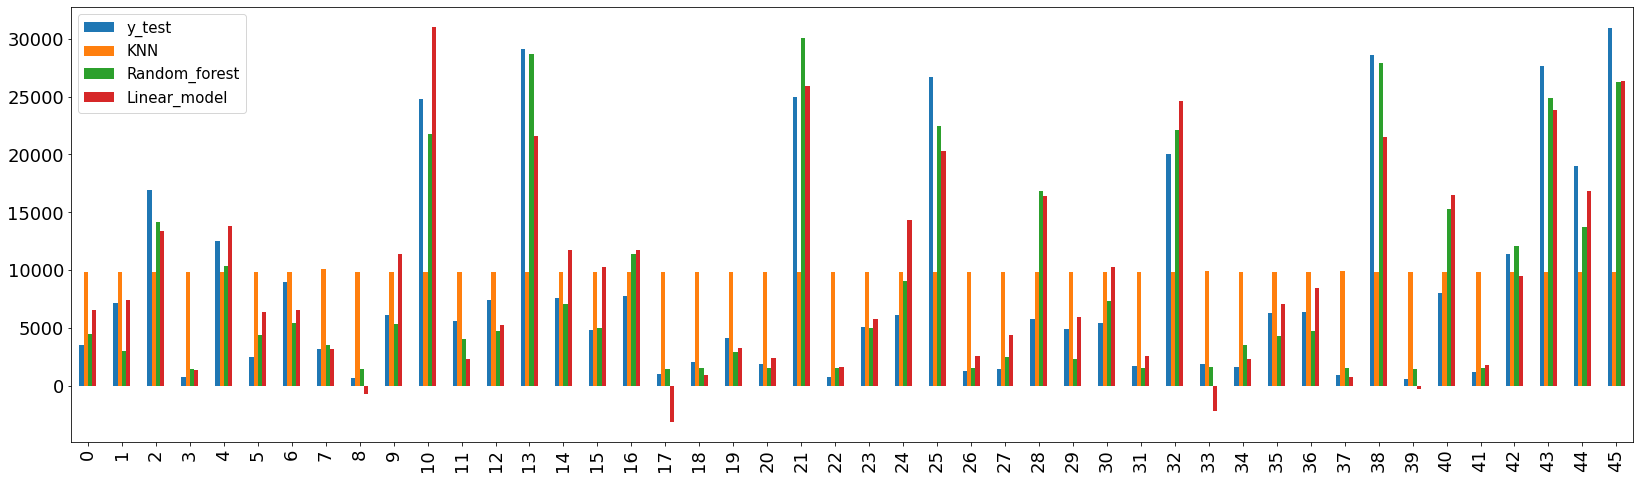

In [77]:
data.reset_index(inplace  =True,drop =True)
data.plot(kind ="bar" ,figsize =(28,8) )

In [78]:
from sklearn.metrics import r2_score
Error_data = []
Error_data.append(r2_score(y_test,y_pred_KNN) )
# ,columns ="% error in KNN Model")
# Error_data["% error in Random Forest Model"] = 
Error_data.append(r2_score(y_test,y_pred_RFR))
# Error_data["% error in Lasso Model"] = 
Error_data.append(r2_score(y_test,y_pred_Lasso))

In [79]:
temp = pd.DataFrame(Error_data).T
temp.columns=["% Accuracy score in KNN Model","% Accuracy score in Random Forest Model","% Accuracy score in Lasso Model" ]

<AxesSubplot:>

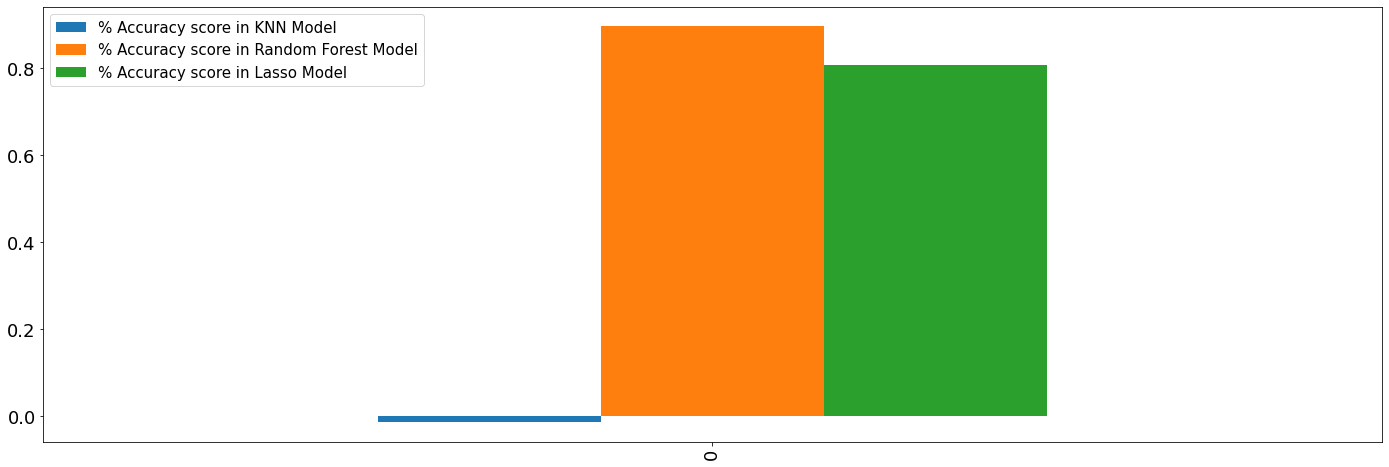

In [80]:
temp.plot(kind ='bar',figsize = (24,8))

In [81]:
temp

,% Accuracy score in KNN Model,% Accuracy score in Random Forest Model,% Accuracy score in Lasso Model
0,-0.013088,0.896481,0.807504


## Observation
* after applying the regression model
1. ] RandomForest Regression model    90.59
1. ] KNN Regression model             -0.0112 ,n_neighbors= 150, polynomial order = 2
1. ] Ridge linear Regression model    80.755
* Ridge linear Regression model provide good agreement of result but lower than the Random Foreset Regressoin. Similarly, Random Forest Regression makes 90.59 Accuracy where KNN Regression model not provides agreement accuracy level so for rows less than 10000,  RandomForest regression model will be the best agreement